# Importing libraries and loading data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import json
import re

In [3]:
companies = pd.read_csv('C:/Users/Fernanda/Documents/CloudWalk project/data_case_2024_03.csv')

# Investigating our dataset

In [5]:
companies.head()

,document_number,cnpj_basico,establishment_type,razao_social,nome_fantasia,opening_date,cnae,cnae_description,mcc,mcc_description,total_branches_and_associates,city_state,city_code,zip_code,share_capital,size_company,juri_description,juri_description_ENG,email_provider
0,79690152000466,79690152,FILIAL,COMERCIAL AGRICOLA DE PARANAVAI LTDA,KATO TRATORES E IMPLEMENTOS,26 de novembro de 2003,4661300,"Comércio atacadista de máquinas, aparelhos e e...",5599,"Miscellaneous Automotive, Aircraft, and Farm E...","{""total_associates"": 8, ""total_branches"": ""12 ...",Ubiratã - PR,4128005,85440000,4750000.0,OTHER,Sociedade Empresária Limitada,Limited Liability Company (LLC),NaN
1,79690152000385,79690152,FILIAL,COMERCIAL AGRICOLA DE PARANAVAI LTDA,COMERCIAL AGRICOLA DE PARANAVAI LTDA,17 de setembro de 1976,4661300,"Comércio atacadista de máquinas, aparelhos e e...",5599,"Miscellaneous Automotive, Aircraft, and Farm E...","{""total_associates"": 8, ""total_branches"": ""12 ...",Loanda - PR,4113502,87900000,4750000.0,OTHER,Sociedade Empresária Limitada,Limited Liability Company (LLC),NaN
2,79690152000628,79690152,FILIAL,COMERCIAL AGRICOLA DE PARANAVAI LTDA,KATO TRATORES E IMPLEMENTOS,10 de janeiro de 1995,4661300,"Comércio atacadista de máquinas, aparelhos e e...",5599,"Miscellaneous Automotive, Aircraft, and Farm E...","{""total_associates"": 8, ""total_branches"": ""12 ...",Maringá - PR,4115200,87065005,4750000.0,OTHER,Sociedade Empresária Limitada,Limited Liability Company (LLC),katoagricola.com.br
3,79690152000709,79690152,FILIAL,COMERCIAL AGRICOLA DE PARANAVAI LTDA,KATO TRATORES E IMPLEMENTOS,22 de junho de 1999,4661300,"Comércio atacadista de máquinas, aparelhos e e...",5599,"Miscellaneous Automotive, Aircraft, and Farm E...","{""total_associates"": 8, ""total_branches"": ""12 ...",Umuarama - PR,4128104,87507011,4750000.0,OTHER,Sociedade Empresária Limitada,Limited Liability Company (LLC),katoagricola.com.br
4,79690152000113,79690152,MATRIZ,COMERCIAL AGRICOLA DE PARANAVAI LTDA,NaN,22 de novembro de 1968,4661300,"Comércio atacadista de máquinas, aparelhos e e...",5599,"Miscellaneous Automotive, Aircraft, and Farm E...","{""total_associates"": 8, ""total_branches"": ""12 ...",Paranavaí - PR,4118402,87711000,4750000.0,OTHER,Sociedade Empresária Limitada,Limited Liability Company (LLC),KATOAGRICOLA.COM.BR


In [6]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977587 entries, 0 to 977586
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   document_number                977587 non-null  int64  
 1   cnpj_basico                    977587 non-null  int64  
 2   establishment_type             977587 non-null  object 
 3   razao_social                   977587 non-null  object 
 4   nome_fantasia                  356890 non-null  object 
 5   opening_date                   977587 non-null  object 
 6   cnae                           977587 non-null  int64  
 7   cnae_description               977587 non-null  object 
 8   mcc                            977587 non-null  int64  
 9   mcc_description                977587 non-null  object 
 10  total_branches_and_associates  977587 non-null  object 
 11  city_state                     977587 non-null  object 
 12  city_code                     

Using the **info()** function, we observe that our dataset comprises 977,587 rows and 19 columns. The data types of these columns vary, including integers, floats, and objects. Notably, the columns **'name_fantasia'** and **'email_provider'** contain missing values. While it is possible to impute these missing values using data from other rows, this is unlikely to significantly impact our analysis.

In [8]:
companies.describe(include='all')

,document_number,cnpj_basico,establishment_type,razao_social,nome_fantasia,opening_date,cnae,cnae_description,mcc,mcc_description,total_branches_and_associates,city_state,city_code,zip_code,share_capital,size_company,juri_description,juri_description_ENG,email_provider
count,9.775870e+05,9.775870e+05,977587,977587,356890,977587,9.775870e+05,977587,977587.000000,977587,977587,977587,9.775870e+05,9.775870e+05,9.775870e+05,977587,977587,977587,673615
unique,NaN,NaN,2,942564,319136,15172,NaN,1215,NaN,205,855,399,NaN,NaN,NaN,3,4,4,55288
top,NaN,NaN,MATRIZ,LUCKNOW EMPREENDIMENTOS E PARTICIPACOES LTDA.,O BOTICARIO,26 de janeiro de 2021,NaN,Comércio varejista de artigos do vestuário e a...,NaN,Family Clothing Stores,"{""total_associates"": 1, ""total_branches"": ""1 b...",Curitiba - PR,NaN,NaN,NaN,NOT_INFORMED,Empresário (Individual),Sole Proprietorship,GMAIL.COM
freq,NaN,NaN,936771,370,141,790,NaN,45996,NaN,60911,694961,230573,NaN,NaN,NaN,855018,552184,552184,216498
mean,2.825492e+13,2.825492e+07,NaN,NaN,NaN,NaN,5.559245e+06,NaN,5707.652990,NaN,NaN,NaN,4.112128e+06,8.453936e+07,2.822309e+06,NaN,NaN,NaN,NaN
std,1.813016e+13,1.813016e+07,NaN,NaN,NaN,NaN,2.149113e+06,NaN,1927.271841,NaN,NaN,NaN,7.589128e+03,2.212843e+06,1.884717e+08,NaN,NaN,NaN,NaN
min,4.100006e+08,4.100000e+02,NaN,NaN,NaN,NaN,1.113010e+05,NaN,742.000000,NaN,NaN,NaN,4.100103e+06,3.115031e+07,0.000000e+00,NaN,NaN,NaN,NaN
25%,1.525341e+13,1.525341e+07,NaN,NaN,NaN,NaN,4.520007e+06,NaN,5099.000000,NaN,NaN,NaN,4.106902e+06,8.304042e+07,1.000000e+03,NaN,NaN,NaN,NaN
50%,2.793899e+13,2.793899e+07,NaN,NaN,NaN,NaN,4.781400e+06,NaN,5734.000000,NaN,NaN,NaN,4.108809e+06,8.520000e+07,8.000000e+03,NaN,NaN,NaN,NaN
75%,3.653872e+13,3.653872e+07,NaN,NaN,NaN,NaN,7.119702e+06,NaN,7311.000000,NaN,NaN,NaN,4.118204e+06,8.619100e+07,3.000000e+04,NaN,NaN,NaN,NaN


The **'describe()'** function reveals that some entries in the document_number column do not adhere to the expected 14-digit format. Additionally, the **'cnpj_basico'** column contains values with 7 digits instead of the required 8 digits. Furthermore, the **'share_capital'** column has a minimum value of 0, which warrants further investigation to determine its correctness.

In [10]:
# Function to check if a value is a 14-digit number
def check_document_number(value):
    return str(value).isdigit() and len(str(value)) == 14

# Apply the function to the 'document_number' column and filter out invalid entries
invalid_document_numbers = companies[~companies['document_number'].apply(check_document_number)]

# Display invalid document numbers
invalid_document_numbers.size

2802291

In [11]:
# Function to check if a value is a 8-digit number
def check_CNPJ_basico(value):
    return str(value).isdigit() and len(str(value)) == 8

# Apply the function to the 'CNPJ_basico' column and filter out invalid entries
invalid_CNPJ_basico = companies[~companies['cnpj_basico'].apply(check_CNPJ_basico)]

# Display invalid CNPJ basico values
invalid_CNPJ_basico.size

2802291

Upon examining the **'document_number'** and **'cnpj_basico'** columns for incorrect formats, we observe that they contain the same number of rows. Consequently, any incorrect entries in the **'document_number'** column also render the corresponding entries in the **'cnpj_basico'** column incorrect, as the latter depends on the former.

In [13]:
#grouping data by CNPJ basico and Razao Social
incorrect_cnpj_grouped = invalid_document_numbers.groupby(['cnpj_basico', 'razao_social']).size().reset_index(name='count')
incorrect_cnpj_grouped

,cnpj_basico,razao_social,count
0,410,BIOAGRI ANALISES DE ALIMENTOS LTDA,1
1,1474,CERAMICA VIRGINIA LTDA,1
2,1612,EMPLOYER GESTAO DE MAO DE OBRA LTDA,1
3,5105,PANIFICADORA TATY PAN LTDA,1
4,5275,CONSTRUTECKMA ENGENHARIA LTDA.,1
...,...,...,...
135585,9944233,ALFA JK POUSADA LTDA,1
135586,9944242,RODOVEGETAL TRANSPORTE LTDA,1
135587,9944266,BBB CONSULTORES LTDA,1
135588,9944285,OZ3 AUTOMACAO INDUSTRIAL LTDA,1


Upon verifying some of the incorrect CNPJ numbers via Google, we determined that the missing zeros at the beginning are the cause of the discrepancy, preventing the numbers from reaching the required 8 digits. As this issue does not significantly impact our analysis, we have decided to retain the values as they are.

# Preprocessing the dataset

* Extract the numbers from the JSON-like strings on **'total_branches_and_associates'** and create two new columns: **'total_associates'** and **'total_branches'**.

* Convert the **'opening_date'** column to datetime format and create two new columns: **'month'** and **'year'**.

* Normalize the **'city_state'** column and create two new columns: **'city'** and **'state'**.

In [17]:
# Function to extract numbers from the JSON-like strings
def extract_numbers(row):
    # Parse the JSON-like string, changing single quotes to double quotes
    row_dict = json.loads(row.replace("'", "\""))
    #Parses the string into a Python dictionary.
    total_associates = row_dict.get('total_associates', 0)
    total_branches_str = row_dict.get('total_branches', '0 branches')
    # Extract the number from the total_branches string
    total_branches = int(re.search(r'\d+', total_branches_str).group())
    return pd.Series([total_associates, total_branches])

# Apply the function to the column and create new columns
companies[['total_associates', 'total_branches']] = companies['total_branches_and_associates'].apply(extract_numbers)

In [18]:
# Dictionary to map Portuguese month names to month numbers
months_pt_to_en = {
    'janeiro': '01',
    'fevereiro': '02',
    'março': '03',
    'abril': '04',
    'maio': '05',
    'junho': '06',
    'julho': '07',
    'agosto': '08',
    'setembro': '09',
    'outubro': '10',
    'novembro': '11',
    'dezembro': '12'
}

# Function to convert Portuguese date to ISO format
def convert_date(date_str):
    # Split the date string
    parts = date_str.split(' de ')
    day = parts[0]
    month = months_pt_to_en[parts[1].strip()]
    year = parts[2]
    # Return the date in the desired format
    return f"{year}/{month}/{day.zfill(2)}"

# Apply the conversion function to the 'opening_date' column
companies['opening_date'] = companies['opening_date'].apply(convert_date)

In [19]:
#normalize city and state columns
companies[['city', 'state']] = companies['city_state'].str.split(' - ', expand=True)

#Delete 'city_state' column
companies.drop(columns=['city_state'], inplace=True)

In [20]:
#changing 'opening_date' datatype to datetime format
companies['opening_date'] = pd.to_datetime(companies['opening_date'])

In [21]:
#Extract year from 'opening_date' and create a new column
companies['opening_year'] = companies['opening_date'].dt.year

In [22]:
#Extract month from 'opening_date' and create two columns: month(number) and month(name)
companies['opening_month'] = companies['opening_date'].dt.month
companies['opening_month_txt'] = companies['opening_date'].dt.month_name()
companies.head()

,document_number,cnpj_basico,establishment_type,razao_social,nome_fantasia,opening_date,cnae,cnae_description,mcc,mcc_description,...,juri_description,juri_description_ENG,email_provider,total_associates,total_branches,city,state,opening_year,opening_month,opening_month_txt
0,79690152000466,79690152,FILIAL,COMERCIAL AGRICOLA DE PARANAVAI LTDA,KATO TRATORES E IMPLEMENTOS,2003-11-26,4661300,"Comércio atacadista de máquinas, aparelhos e e...",5599,"Miscellaneous Automotive, Aircraft, and Farm E...",...,Sociedade Empresária Limitada,Limited Liability Company (LLC),NaN,8,12,Ubiratã,PR,2003,11,November
1,79690152000385,79690152,FILIAL,COMERCIAL AGRICOLA DE PARANAVAI LTDA,COMERCIAL AGRICOLA DE PARANAVAI LTDA,1976-09-17,4661300,"Comércio atacadista de máquinas, aparelhos e e...",5599,"Miscellaneous Automotive, Aircraft, and Farm E...",...,Sociedade Empresária Limitada,Limited Liability Company (LLC),NaN,8,12,Loanda,PR,1976,9,September
2,79690152000628,79690152,FILIAL,COMERCIAL AGRICOLA DE PARANAVAI LTDA,KATO TRATORES E IMPLEMENTOS,1995-01-10,4661300,"Comércio atacadista de máquinas, aparelhos e e...",5599,"Miscellaneous Automotive, Aircraft, and Farm E...",...,Sociedade Empresária Limitada,Limited Liability Company (LLC),katoagricola.com.br,8,12,Maringá,PR,1995,1,January
3,79690152000709,79690152,FILIAL,COMERCIAL AGRICOLA DE PARANAVAI LTDA,KATO TRATORES E IMPLEMENTOS,1999-06-22,4661300,"Comércio atacadista de máquinas, aparelhos e e...",5599,"Miscellaneous Automotive, Aircraft, and Farm E...",...,Sociedade Empresária Limitada,Limited Liability Company (LLC),katoagricola.com.br,8,12,Umuarama,PR,1999,6,June
4,79690152000113,79690152,MATRIZ,COMERCIAL AGRICOLA DE PARANAVAI LTDA,NaN,1968-11-22,4661300,"Comércio atacadista de máquinas, aparelhos e e...",5599,"Miscellaneous Automotive, Aircraft, and Farm E...",...,Sociedade Empresária Limitada,Limited Liability Company (LLC),KATOAGRICOLA.COM.BR,8,12,Paranavaí,PR,1968,11,November


In [23]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977587 entries, 0 to 977586
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   document_number                977587 non-null  int64         
 1   cnpj_basico                    977587 non-null  int64         
 2   establishment_type             977587 non-null  object        
 3   razao_social                   977587 non-null  object        
 4   nome_fantasia                  356890 non-null  object        
 5   opening_date                   977587 non-null  datetime64[ns]
 6   cnae                           977587 non-null  int64         
 7   cnae_description               977587 non-null  object        
 8   mcc                            977587 non-null  int64         
 9   mcc_description                977587 non-null  object        
 10  total_branches_and_associates  977587 non-null  object        
 11  

Using the **info()** function, we can confirm that the **'opening_date'** column is now in datetime format. Additionally, all newly created columns — **'total_associates'**, **'total_branches'**, **'month'**, **'year'**, **'city'**, and **'state'** — contain no missing values.

# Exploratory Data Analysis

In [26]:
#group data by year
yearly_counts = companies['opening_year'].value_counts().sort_index()
yearly_counts = yearly_counts.to_frame().reset_index()
yearly_counts.columns = ['year','number_of_companies']
yearly_counts.head()

,year,number_of_companies
0,1921,1
1,1934,1
2,1939,1
3,1941,1
4,1944,2


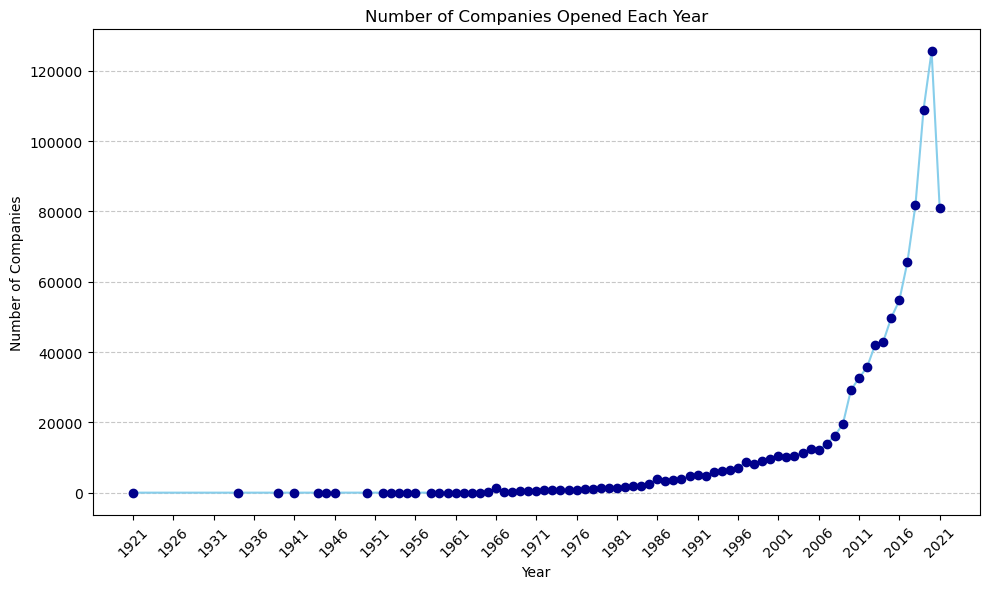

In [27]:
#ploting companies opened timeline
plt.figure(figsize=(10, 6))

plt.plot(yearly_counts['year'], yearly_counts['number_of_companies'], color='skyblue')
plt.scatter(yearly_counts['year'], yearly_counts['number_of_companies'], color='darkblue', zorder=3)
plt.title('Number of Companies Opened Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Companies')
plt.xticks(np.arange(min(yearly_counts['year']), max(yearly_counts['year']) + 1, 5), rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [28]:
companies['opening_date'].max()

Timestamp('2021-06-30 00:00:00')

Upon investigating the significant drop in companies opened in 2021, we found that the last entry in our dataset is from June 30, 2021. This indicates that data for the latter half of 2021 is missing.

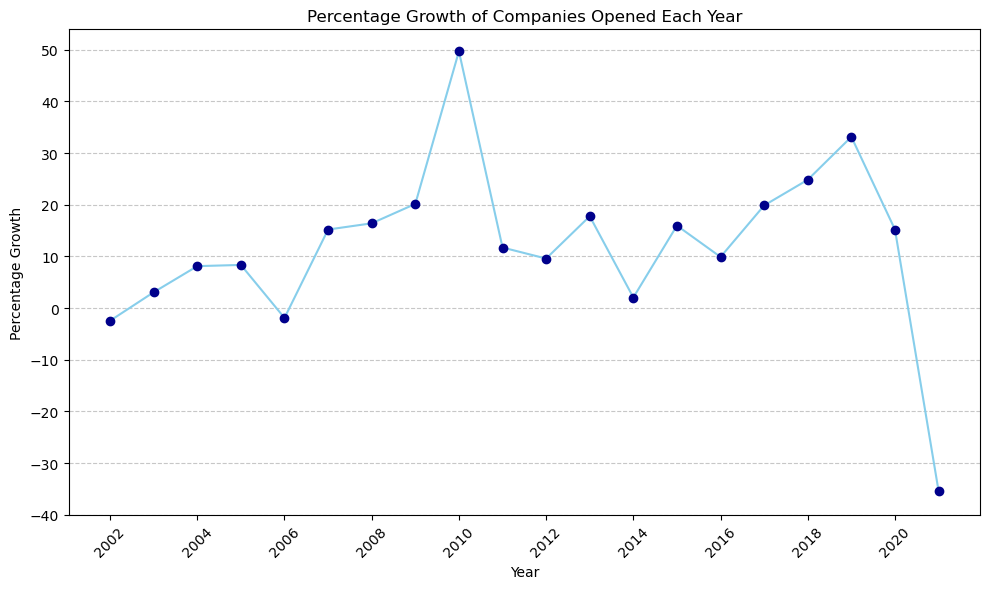

In [30]:
#Ploting % grown for the last 20 years of data

# Filter the DataFrame for years 2001 to 2021
yearly_counts = yearly_counts[(yearly_counts['year'] >= 2001) & (yearly_counts['year'] <= 2021)]

# Calculate percentage growth
yearly_counts['percentage_growth'] = ((yearly_counts['number_of_companies'] - 
                                           yearly_counts['number_of_companies'].shift(1)) /
                                          yearly_counts['number_of_companies'].shift(1)) * 100

# Drop the first row as it will have NaN for percentage growth
yearly_counts = yearly_counts.dropna()
                                                   
# Plot the percentage growth
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts['year'], yearly_counts['percentage_growth'], color='skyblue')
plt.scatter(yearly_counts['year'], yearly_counts['percentage_growth'], color='darkblue', zorder=3)
plt.title('Percentage Growth of Companies Opened Each Year')
plt.xlabel('Year')
plt.ylabel('Percentage Growth')
plt.yticks(range(-40, 51, 10))
plt.xticks(np.arange(min(yearly_counts['year']), max(yearly_counts['year']) + 1, 2), rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Plotting the percentage growth for the last two decades reveals distinct patterns. While most data points exhibit a moderate increase of 10-20%, there are noteworthy deviations. Notably, there is a remarkable surge in growth in 2010, with a remarkable 50% increase. Conversely, in 2020, there is a decline following the growth trend that began in 2016. This decline could be attributed to the coronavirus pandemic, though more data is needed to confirm this theory. The significant drop in 2021 is due to missing data for the second half of the year.

In [32]:
# Define a function to determine the semester
def get_semester(month):
    if 1 <= month <= 6:
        return 1
    else:
        return 2

# Apply the function to create the new column
companies['semester'] = companies['opening_month'].apply(get_semester)

print(companies.head())

   document_number  cnpj_basico establishment_type  \
0   79690152000466     79690152             FILIAL   
1   79690152000385     79690152             FILIAL   
2   79690152000628     79690152             FILIAL   
3   79690152000709     79690152             FILIAL   
4   79690152000113     79690152             MATRIZ   

                           razao_social                         nome_fantasia  \
0  COMERCIAL AGRICOLA DE PARANAVAI LTDA           KATO TRATORES E IMPLEMENTOS   
1  COMERCIAL AGRICOLA DE PARANAVAI LTDA  COMERCIAL AGRICOLA DE PARANAVAI LTDA   
2  COMERCIAL AGRICOLA DE PARANAVAI LTDA           KATO TRATORES E IMPLEMENTOS   
3  COMERCIAL AGRICOLA DE PARANAVAI LTDA           KATO TRATORES E IMPLEMENTOS   
4  COMERCIAL AGRICOLA DE PARANAVAI LTDA                                   NaN   

  opening_date     cnae                                   cnae_description  \
0   2003-11-26  4661300  Comércio atacadista de máquinas, aparelhos e e...   
1   1976-09-17  4661300  Comérci

In [33]:
semester = companies.groupby(['opening_year', 'semester']).size().reset_index(name='num_companies')
semester.tail()

,opening_year,semester,num_companies
136,2019,1,52910
137,2019,2,56051
138,2020,1,58047
139,2020,2,67481
140,2021,1,81085


In [34]:
# Calculate the percentage growth for semester 1 and 2, using the last 20 years of data

#Filtering and creating new dataframes:
semester_one = semester[(semester['opening_year'] >= 2001) & (semester['opening_year'] <= 2021) & (semester['semester'] == 1)]
semester_two = semester[(semester['opening_year'] >= 2000) & (semester['opening_year'] <= 2020) & (semester['semester'] == 2)]

# Calculate the percentage growth for semester 1 and 2, using the last 20 years of data
semester_one['percentage_growth'] = ((semester_one['num_companies'] - 
                                           semester_one['num_companies'].shift(1)) /
                                          semester_one['num_companies'].shift(1)) * 100

semester_two['percentage_growth'] = ((semester_two['num_companies'] - 
                                           semester_two['num_companies'].shift(1)) /
                                          semester_two['num_companies'].shift(1)) * 100

# Remove the NaN values resulting from the pct_change operation
semester_one = semester_one.dropna()
semester_two = semester_two.dropna()

C:\Users\Fernanda\AppData\Local\Temp\ipykernel_23032\1980716802.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semester_one['percentage_growth'] = ((semester_one['num_companies'] -
C:\Users\Fernanda\AppData\Local\Temp\ipykernel_23032\1980716802.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semester_two['percentage_growth'] = ((semester_two['num_companies'] -


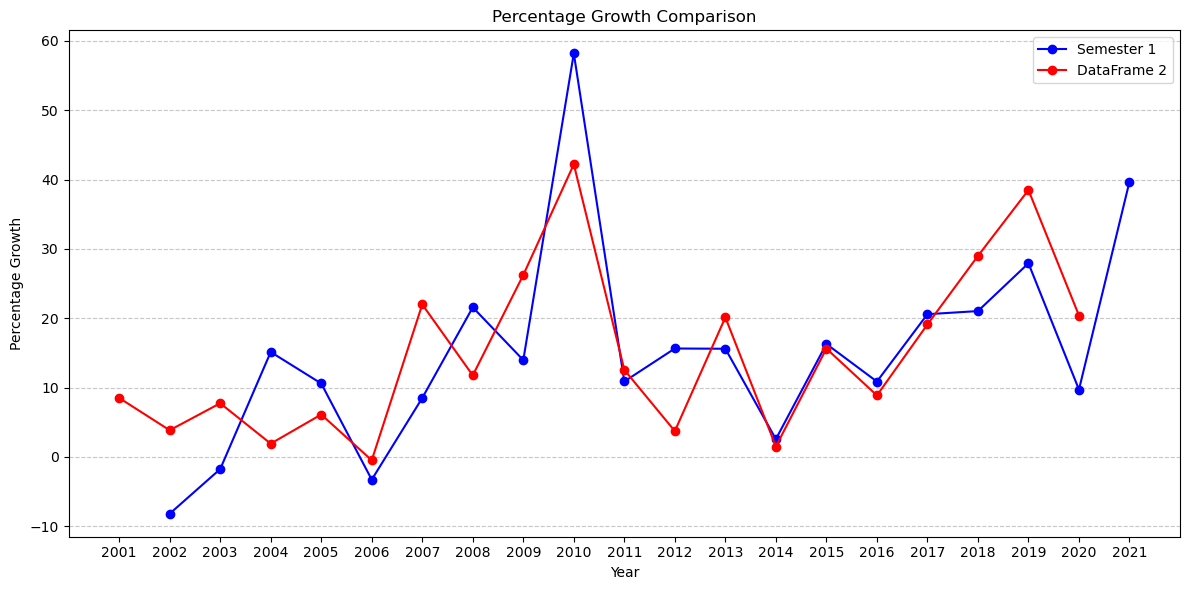

In [35]:
plt.figure(figsize=(12, 6))

# Plotting the first DataFrame
plt.plot(semester_one['opening_year'], semester_one['percentage_growth'], marker='o', label='Semester 1', color='blue')

# Plotting the second DataFrame
plt.plot(semester_two['opening_year'], semester_two['percentage_growth'], marker='o', label='DataFrame 2', color='red')

# Adding titles and labels
plt.title('Percentage Growth Comparison')
plt.xlabel('Year')
plt.ylabel('Percentage Growth')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Combine the year ranges from both DataFrames
all_years = sorted(set(semester_one['opening_year']).union(set(semester_two['opening_year'])))

# Set x-ticks to show all years
plt.xticks(all_years)

# Show plot
plt.show()

When grouping the data by semester, we observe that Semester 1 of 2021 shows higher growth compared to any other semester in the past 20 years, except for 2010. This suggests that the decline in 2020, possibly due to the coronavirus pandemic, may have been recovered by 2021. However, to confirm this, we need more data from the second half of 2021 and beyond.

In [37]:
#Grouping data by month for 2000 - 2020:
companies2 = companies[(companies['opening_year'] >= 2000) & (companies['opening_year'] <= 2020)]
monthly_counts = companies2.groupby(['opening_month','opening_month_txt']).count().sort_values('opening_month', ascending=True).head(12).reset_index()
monthly_counts = monthly_counts[['opening_month','opening_month_txt','document_number']]
monthly_counts

,opening_month,opening_month_txt,document_number
0,1,January,61349
1,2,February,66149
2,3,March,71854
3,4,April,62719
4,5,May,67933
5,6,June,65043
6,7,July,73183
7,8,August,74603
8,9,September,70244
9,10,October,70717


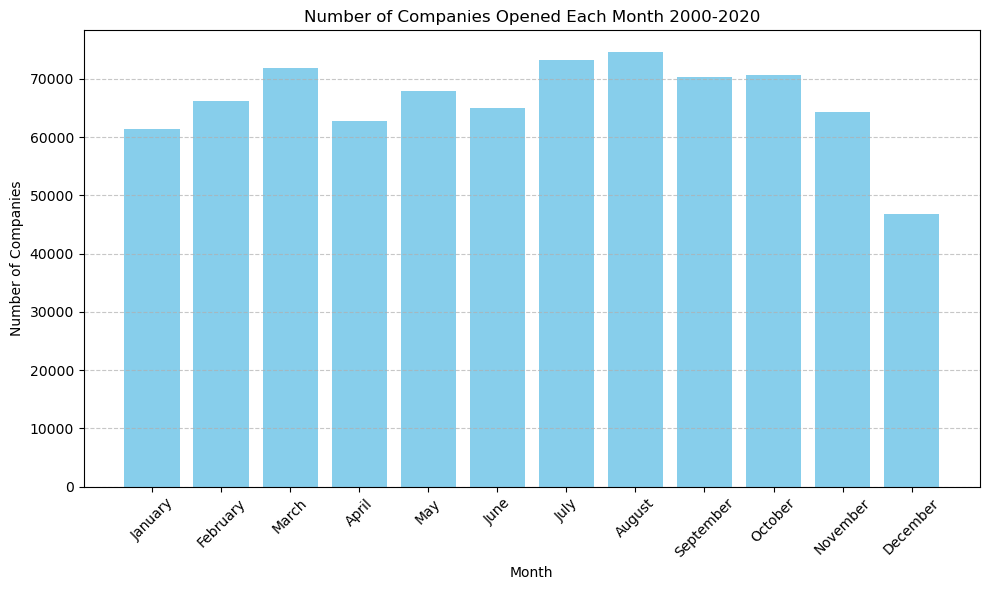

In [38]:
#Ploting bar chart
plt.figure(figsize=(10, 6))
plt.bar(monthly_counts['opening_month_txt'], monthly_counts['document_number'], color='skyblue')
plt.title('Number of Companies Opened Each Month 2000-2020')
plt.xlabel('Month')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The number of companies opened each month remains relatively consistent throughout the year, with only slight fluctuations. This suggests that the process of company formation is relatively steady over time, with certain months bein slightly more popular. There is a visible dip in the number os companies opened in December. This could be to the holiday season, where fewer businesses are started.

(943010, 2)


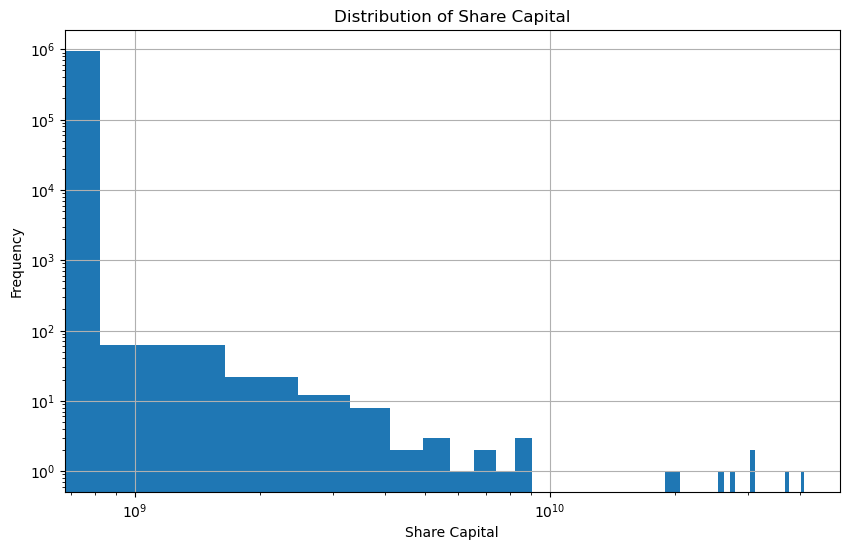

In [40]:
# Histogram of share capital
unique = companies[['cnpj_basico','share_capital']]
unique = unique.drop_duplicates()
print(unique.shape)

plt.figure(figsize=(10, 6))
plt.hist(unique['share_capital'], bins=50, log=True)
plt.xscale('log')
plt.title('Distribution of Share Capital')
plt.xlabel('Share Capital')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Since our dataset has a large range, I've applied a logarithmic scale to the x-axis to help compress the range of values and make the distribution more interpretable. We can see that the data is highly skewed towards smaller values, indicating that a large number of companies have relatively low share capital, with only a few companies having extremely high share capital. There is a visible concentration of companies with share capital values around 10^9 and 10^10.

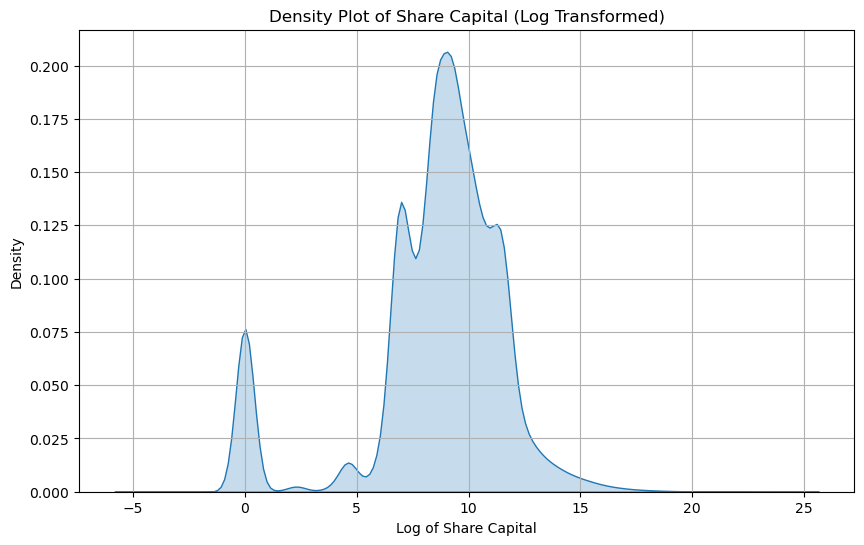

In [42]:
filtered_data = unique[unique['share_capital']>0]

log_data = np.log(filtered_data)

plt.figure(figsize=(10,6))

sns.kdeplot(log_data['share_capital'], bw_adjust=2, fill=True)
plt.title('Density Plot of Share Capital (Log Transformed)')
plt.xlabel('Log of Share Capital')
plt.ylabel('Density')
plt.grid(True)
plt.show()

The log transformation helped to reduce the skewness and made the data more normally distributed, which is why the density plot is smoother. The highest density around a log value of 10 indicates that most companies have a share capital around this value. The density then decreases, showing that fewer companies have share capital beyond this range.
The small peak around 0 (log value) could indicate a separate group of entities with much smaller share capital, possibly close to zero or very low values.

In [44]:
#counting the number of each unique CNPJ basico value:
unique_companies = companies['cnpj_basico'].value_counts().reset_index()
unique_companies.columns = ['cnpj_basico','count']
unique_companies.shape

(943010, 2)

In [45]:
#Delete CNPJ basico duplicate values and create a df with the unique values and 'total_branches' column:
unique_companies2 = companies.drop_duplicates(subset=['cnpj_basico'])
unique_companies2 = unique_companies2[['cnpj_basico', 'total_branches']].sort_values(by = 'total_branches', ascending=False)
unique_companies2.shape

(943010, 2)

In [46]:
#join the two dataframes using the CNPJ value as key:
merged_unique = pd.merge(unique_companies, unique_companies2, on='cnpj_basico', how='inner')
merged_unique.head()

,cnpj_basico,count,total_branches
0,15913061,370,372
1,77500049,151,285
2,78586674,100,167
3,78614278,82,148
4,75584110,74,250


In [47]:
#number of total branches matching:
mask = merged_unique['count'] == merged_unique['total_branches']
matching_branches = merged_unique[mask]
matching_branches.shape

(902674, 3)

In [48]:
#number of total branches provided greater than the number produced by the dataset:
mask = merged_unique['count'] < merged_unique['total_branches']
greater_branches = merged_unique[mask]
greater_branches.shape

(40336, 3)

The dataset exhibits a high degree of accuracy, with 95.7% of the provided branch numbers aligning precisely with the dataset's branch counts. A marginal 4.3% discrepancy is noted, wherein the provided branch figures exceed those recorded in the dataset. This disparity is likely attributed to the presence of branches outside the state of Parana, as our dataset exclusively encompasses data from this region.

In [50]:
#grouping data by CNAE
unique_cnae = companies.groupby(['cnae','cnae_description']).size().reset_index(name='count')
unique_cnae.shape

(1216, 3)

We've identified 1216 distinct types of business activities within our dataset, presenting a considerable range that may impede the extraction of meaningful insights. To address this, we're undertaking an aggregation effort to condense these activities into more manageable groupings. Leveraging resources from the IBGE website, we've accessed detailed descriptions for each classification, facilitating the creation of consolidated categories.

This strategic aggregation process aims to enhance the interpretability and utility of our data, allowing for more effective analysis and decision-making. By organizing these activities into coherent groups, we can derive clearer insights and actionable conclusions from our dataset.

In [52]:
#create a new column 'cnae_seção' to group the types of business activities into fewer groups according to IBGE website:

#Changing CNAE datatype to string, so we can manipulate it
companies['cnae'] = companies['cnae'].astype(str)

def pad_cnae(cnae_value):
    # Add leading zero if the string has 6 digits
    if len(cnae_value) == 6:
        cnae_value = '0' + cnae_value
    return cnae_value

# Apply the padding function
companies['cnae'] = companies['cnae'].apply(pad_cnae)

def assign_cnae_secao(cnae_value):
    first_two_digits = int(cnae_value[:2])
    if first_two_digits in {1, 2, 3}:
        return 'A'
    elif 5 <= first_two_digits <= 9:
        return 'B'
    elif 10 <= first_two_digits <= 33:
        return 'C'
    elif first_two_digits == 35:
        return 'D'
    elif 36 <= first_two_digits <= 39:
        return 'E'
    elif 41 <= first_two_digits <= 43:
        return 'F'
    elif 45 <= first_two_digits <= 47:
        return 'G'
    elif 49 <= first_two_digits <= 53:
        return 'H'
    elif first_two_digits in {55,56}:
        return 'I'
    elif 58 <= first_two_digits <= 63:
        return 'J'
    elif 64 <= first_two_digits <= 66:
        return 'K'
    elif first_two_digits == 68:
        return 'L'
    elif 69 <= first_two_digits <= 75:
        return 'M'
    elif 77 <= first_two_digits <= 82:
        return 'N'
    elif first_two_digits == 84:
        return 'O'
    elif first_two_digits == 85:
        return 'P'
    elif 86 <= first_two_digits <= 88:
        return 'Q'
    elif 90 <= first_two_digits <= 93:
        return 'R'
    elif 94 <= first_two_digits <= 96:
        return 'S'
    elif first_two_digits == 97:
        return 'T'
    elif first_two_digits == 99:
        return 'U'
    else:
        return 'Other' 

# Apply the function to create the new column
companies['cnae_seção'] = companies['cnae'].apply(assign_cnae_secao)

In [53]:
#group by new cnae division:
new_cnae = companies.groupby(['cnae_seção']).size().reset_index(name='count')
new_cnae.head()

,cnae_seção,count
0,A,8538
1,B,1039
2,C,101633
3,D,412
4,E,2823


In [54]:
#table containing fewer cnae groups from IBGE website:
cnae = pd.read_csv('C:/Users/Fernanda/Documents/CloudWalk project/CNAE_divisions.csv')
pd.set_option('max_colwidth', 1000)
cnae

,Seção,Divisões,Denominação
0,A,01 .. 03,"AGRICULTURA, PECUÁRIA, PRODUÇÃO FLORESTAL, PESCA E AQÜICULTURA"
1,B,05 .. 09,INDÚSTRIAS EXTRATIVAS
2,C,10 .. 33,INDÚSTRIAS DE TRANSFORMAÇÃO
3,D,35 .. 35,ELETRICIDADE E GÁS
4,E,36 .. 39,"ÁGUA, ESGOTO, ATIVIDADES DE GESTÃO DE RESÍDUOS E DESCONTAMINAÇÃO"
5,F,41 .. 43,CONSTRUÇÃO
6,G,45 .. 47,COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS
7,H,49 .. 53,"TRANSPORTE, ARMAZENAGEM E CORREIO"
8,I,55 .. 56,ALOJAMENTO E ALIMENTAÇÃO
9,J,58 .. 63,INFORMAÇÃO E COMUNICAÇÃO


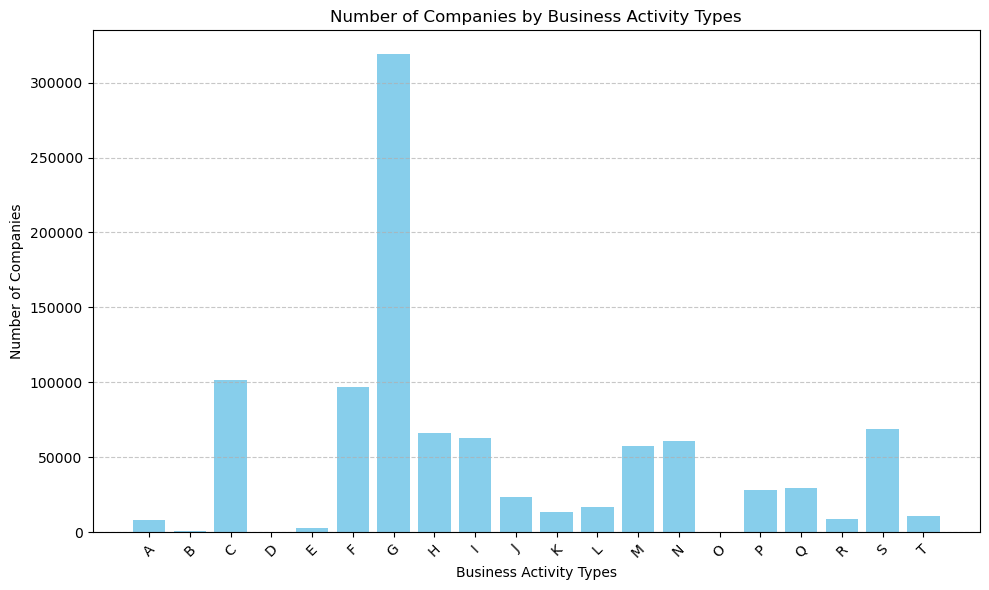

In [55]:
#Ploting bar chart Number of companies by each CNAE section
plt.figure(figsize=(10, 6))
plt.bar(new_cnae['cnae_seção'], new_cnae['count'], color='skyblue')
plt.title('Number of Companies by Business Activity Types')
plt.xlabel('Business Activity Types')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

By consolidating the data into fewer groups, it becomes evident that Section G (COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS) significantly outnumbers all other sections in terms of the number of companies. This section boasts three times as many companies as the second-largest section, Section C (INDÚSTRIAS DE TRANSFORMAÇÃO). In contrast, Section O (ADMINISTRAÇÃO PÚBLICA, DEFESA E SEGURIDADE SOCIAL) has a notably smaller presence, with only 23 companies.

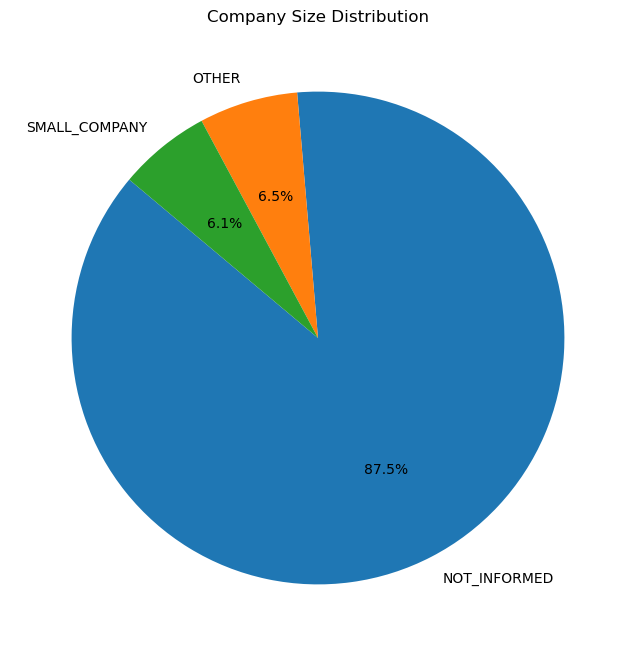

In [57]:
plt.figure(figsize=(8, 8))
size_counts = companies['size_company'].value_counts()
plt.pie(size_counts, labels=size_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Company Size Distribution')
plt.show()

In [58]:
#checking small companies data
small_companies = companies[companies['size_company']=='SMALL_COMPANY']
small_companies[['share_capital','total_associates','total_branches']].describe()

,share_capital,total_associates,total_branches
count,5.918400e+04,59184.000000,59184.000000
mean,4.193994e+05,1.809070,2.085581
std,3.596192e+07,1.569173,5.311702
min,0.000000e+00,1.000000,1.000000
25%,1.500000e+04,1.000000,1.000000
50%,6.500000e+04,2.000000,1.000000
75%,1.250000e+05,2.000000,2.000000
max,8.730740e+09,140.000000,128.000000


In [59]:
#Checking Other companies data
other_companies = companies[companies['size_company']=='OTHER']
other_companies[['share_capital','total_associates','total_branches']].describe()

,share_capital,total_associates,total_branches
count,6.338500e+04,63385.000000,63385.000000
mean,4.170314e+07,2.927144,17.994336
std,7.188598e+08,8.418139,100.142661
min,0.000000e+00,1.000000,1.000000
25%,2.000000e+04,2.000000,1.000000
50%,2.000000e+05,2.000000,1.000000
75%,1.744495e+06,3.000000,4.000000
max,3.761600e+10,1355.000000,1892.000000


In [60]:
#Checking Not Informed data
not_informed_companies = companies[companies['size_company']=='NOT_INFORMED']
not_informed_companies[['share_capital','total_associates','total_branches']].describe()

,share_capital,total_associates,total_branches
count,8.550180e+05,855018.000000,855018.000000
mean,1.062875e+05,1.237646,1.124462
std,4.578213e+07,0.667204,2.385922
min,0.000000e+00,1.000000,1.000000
25%,1.000000e+03,1.000000,1.000000
50%,5.000000e+03,1.000000,1.000000
75%,2.000000e+04,1.000000,1.000000
max,4.110617e+10,165.000000,483.000000


Our analysis of the dataset reveals several key points:

Distribution of Categories:

* NOT_INFORMED: The majority of entries (87.5%) fall into this category.
* OTHER: A significant portion (6.5%) is classified under 'OTHER'.
* SMALL_COMPANY: This category includes 6.1%.

Challenges in Categorization:

NOT_INFORMED: This category's large size indicates a substantial amount of missing or unclassified data. Without additional information, it is challenging to draw meaningful insights or accurately categorize these companies.

OTHER: The broad and non-specific nature of this category suggests a need for further refinement. More detailed subcategories could help in understanding the characteristics and distribution of these companies.

Broad Ranges in Available Data:

Share Capital: The range of share capital values is broad, making it difficult to identify clear patterns or trends.
Total Associates and Total Branches: These columns also exhibit wide ranges, further complicating the identification of consistent patterns.

Recommendation:

To enhance the analysis and gain more precise insights, it is crucial to obtain additional information for the 'NOT_INFORMED' and 'OTHER' categories. Specifically, collecting data on key metrics such as revenue and the number of employees would be invaluable. This additional information will allow for more accurate categorization and a deeper understanding of the dataset, ultimately leading to more actionable insights.

In [62]:
#Creating a new dataframe with Latitude and Longitude of all Brazilian cities
cities_lat_lon = pd.read_csv('C:/Users/Fernanda/Documents/CloudWalk project/latitude-longitude-cidades.csv',delimiter=';')

In [63]:
cities_lat_lon.head()

,id_municipio,uf,municipio,longitude,latitude
0,2,AC,Acrelândia,-66.897166,-9.825808
1,3,AC,Assis Brasil,-69.573794,-10.929765
2,4,AC,Brasiléia,-68.749696,-10.994994
3,5,AC,Bujari,-67.955029,-9.815277
4,6,AC,Capixaba,-67.686006,-10.566031


In [64]:
#Filtering data to have only cities of Parana
cities_lat_lon = cities_lat_lon[cities_lat_lon['uf'] == 'PR']
cities_lat_lon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399 entries, 3210 to 3608
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_municipio  399 non-null    int64  
 1   uf            399 non-null    object 
 2   municipio     399 non-null    object 
 3   longitude     399 non-null    float64
 4   latitude      399 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 18.7+ KB


In [65]:
#Create a dataframe with number of companies for each city
city_count = companies['city'].value_counts().reset_index()
city_count.head()

,city,count
0,Curitiba,230573
1,Londrina,53723
2,Maringá,53266
3,Cascavel,31449
4,Ponta Grossa,29708


In [66]:
#Joining both dataframes
cities_PR = pd.merge(city_count, cities_lat_lon[['municipio', 'latitude', 'longitude']],
                     left_on='city', right_on='municipio', how='left')

In [67]:
#Looking for any missing values
cities_PR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       399 non-null    object 
 1   count      399 non-null    int64  
 2   municipio  394 non-null    object 
 3   latitude   394 non-null    float64
 4   longitude  394 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 15.7+ KB


In [68]:
#checking the rows with missing values
cities_null = cities_PR[cities_PR['municipio'].isnull()]
cities_null

,city,count,municipio,latitude,longitude
150,Itapejara d'Oeste,852,NaN,NaN,NaN
196,São Jorge d'Oeste,598,NaN,NaN,NaN
233,Pérola d'Oeste,458,NaN,NaN,NaN
331,Diamante D'Oeste,213,NaN,NaN,NaN
371,Rancho Alegre D'Oeste,131,NaN,NaN,NaN


In [69]:
#getting the index of one of the cities
cities_lat_lon.index[cities_lat_lon['municipio'].str.startswith('Itapejara', na=False)]

Index([3369], dtype='int64')

In [70]:
#checking the format:
cities_lat_lon.loc[3369]

id_municipio                 3332
uf                             PR
municipio       Itapejara d`Oeste
longitude              -52.813823
latitude                -25.96203
Name: 3369, dtype: object

In [71]:
#change the string format to match
cities_lat_lon['municipio'] = cities_lat_lon['municipio'].str.replace('`', "'")
city_count['city'] = city_count['city'].str.replace("D'", "d'")

In [72]:
#merging the data again
cities_PR = pd.merge(city_count, cities_lat_lon[['municipio', 'latitude', 'longitude']],
                     left_on='city', right_on='municipio', how='left')
cities_PR.drop(columns=['municipio'], inplace=True)
cities_PR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       399 non-null    object 
 1   count      399 non-null    int64  
 2   latitude   399 non-null    float64
 3   longitude  399 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 12.6+ KB


In [73]:
cities_PR.head()

,city,count,latitude,longitude
0,Curitiba,230573,-25.419547,-49.264622
1,Londrina,53723,-23.303975,-51.169100
2,Maringá,53266,-23.420545,-51.933298
3,Cascavel,31449,-24.957301,-53.459005
4,Ponta Grossa,29708,-25.091622,-50.166787


In [74]:
!pip install folium

In [75]:
#Ploting heatmap
import folium
from folium.plugins import HeatMap

m = folium.Map(location=[-25.2521, -52.0215], zoom_start=7, tiles='OpenStreetMap')

# Convert data to list of latitudes and longitudes
heat_data = [[row['latitude'], row['longitude'], row['count']] for index, row in cities_PR.iterrows()]

# Create a heatmap
HeatMap(heat_data, radius=20).add_to(m)

# Display the map
m

In [76]:
# Step 1: Identify the top 5 cities with the most companies
top_cities = companies['city'].value_counts().head(5).index

# Step 2: For each of these cities, find the top 3 CNAE codes
top_cities_cnae = []

for city in top_cities:
    city_data = companies[companies['city'] == city]
    top_cnae_counts = city_data['cnae_seção'].value_counts().head(3)
    for cnae, count in top_cnae_counts.items():
        top_cities_cnae.append({'city': city, 'cnae_seção': cnae, 'count': count})

# Step 3: Combine the results into a final DataFrame
top_cities_cnae_df = pd.DataFrame(top_cities_cnae)

print(top_cities_cnae_df)

            city cnae_seção  count
0       Curitiba          G  62148
1       Curitiba          N  21661
2       Curitiba          M  20226
3       Londrina          G  16773
4       Londrina          F   4604
5       Londrina          C   4556
6        Maringá          G  16427
7        Maringá          C   5148
8        Maringá          F   4514
9       Cascavel          G  10685
10      Cascavel          F   3509
11      Cascavel          C   2923
12  Ponta Grossa          G   9955
13  Ponta Grossa          F   3511
14  Ponta Grossa          C   2555


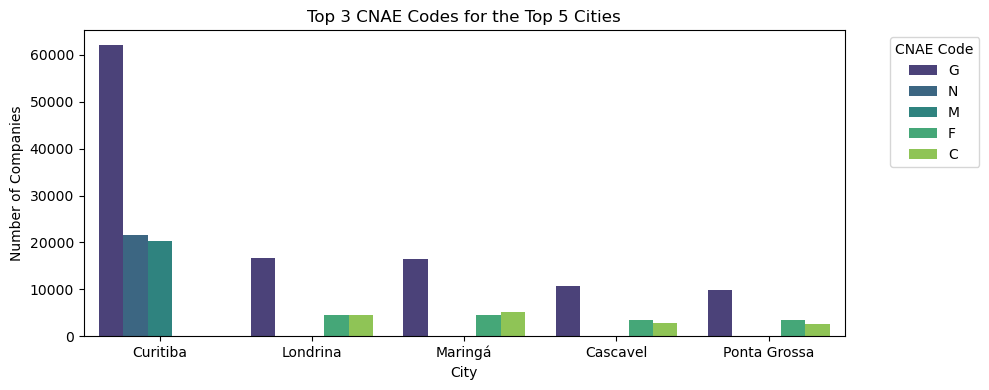

In [77]:
plt.figure(figsize=(10, 4))
bar_plot = sns.barplot(x='city', y='count', hue='cnae_seção', data=top_cities_cnae_df, palette='viridis', dodge=True)

# Adding titles and labels
plt.title('Top 3 CNAE Codes for the Top 5 Cities')
plt.xlabel('City')
plt.ylabel('Number of Companies')
plt.legend(title='CNAE Code', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ensure bars are close to each other
plt.tight_layout()

# Display the plot
plt.show()

Analysis reveals that Londrina, Maringá, Cascavel, and Ponta Grossa share the same top three CNAE sections as the entire dataset. In contrast, Curitiba differs with sections G (COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS), N (ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEMENTARES), and M (ATIVIDADES PROFISSIONAIS, CIENTÍFICAS E TÉCNICAS) being the most prevalent. Notably, for all five cities, CNAE section G remains significantly dominant, with its count being approximately three times higher than that of the second most common section. As expected, these five cities are the largest in Paraná.

# Conclusions and Recomendations

## Dataset Overview
The dataset analyzed comprises 977,587 rows and 19 columns, with data types ranging from integers and floats to objects. Missing values were found in the columns 'name_fantasia' and 'email_provider', though these are not expected to significantly impact the analysis.

## Data Quality Issues
The describe() function reveals that some entries in the 'document_number' column do not adhere to the expected 14-digit format. Additionally, the 'cnpj_basico' column contains values with 7 digits instead of the required 8 digits. Furthermore, the 'share_capital' column has a minimum value of 0, which warrants further investigation to determine its correctness. Upon examining the 'document_number' and 'cnpj_basico' columns, we observe that incorrect entries in the 'document_number' column also render the corresponding entries in the 'cnpj_basico' column incorrect due to dependency.

Upon verifying some of the incorrect CNPJ numbers via Google, we determined that the missing zeros at the beginning are the cause of the discrepancy. As this issue does not significantly impact our analysis, we have decided to retain the values as they are.

## Key Insights from Data Aggregation
A noticeable drop in companies opened in 2021 can be attributed to missing data for the second half of the year. Growth trends revealed a significant increase in 2010 (50% growth) and a decline in 2020, possibly due to the COVID-19 pandemic. Semester 1 of 2021 showed strong growth, suggesting a potential recovery from 2020.

The distribution of share capital is highly skewed toward smaller values. Applying a logarithmic scale to the data helped reveal that most companies have share capital values around 10^9 and 10^10. A small peak around zero suggests a group of companies with very low share capital.

## Monthly Analysis
The number of companies opened each month remains relatively stable, with a slight dip in December, likely due to the holiday season.

## Total Branches Accuracy
The dataset exhibits a high degree of accuracy, with 95.7% of the provided branch numbers aligning precisely with the dataset's branch counts. A marginal 4.3% discrepancy is noted, likely due to branches outside the state of Paraná, as our dataset exclusively encompasses data from this region.

## Business Activity Categorization
We've identified 1,216 distinct types of business activities within our dataset, presenting a considerable range that may impede the extraction of meaningful insights. To address this, we've undertaken an aggregation effort to condense these activities into more manageable groupings, leveraging resources from the IBGE website.

By consolidating the data into fewer groups, it becomes evident that Section G (COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS) significantly outnumbers all other sections, with three times as many companies as the second-largest section, Section C (INDÚSTRIAS DE TRANSFORMAÇÃO). In contrast, Section O (ADMINISTRAÇÃO PÚBLICA, DEFESA E SEGURIDADE SOCIAL) has a notably smaller presence, with only 23 companies.

## City-wise CNAE Analysis
Analysis reveals that Londrina, Maringá, Cascavel, and Ponta Grossa share the same top three CNAE sections as the entire dataset. In contrast, Curitiba differs with sections G, N, and M being the most prevalent. Notably, for all five cities, CNAE section G remains significantly dominant, with its count being approximately three times higher than that of the second most common section. As expected, these five cities are the largest in Paraná.

## Challenges:

Categorization: The majority of entries (87.5%) fall under the NOT_INFORMED category, which indicates significant missing or unclassified data. The broad OTHER category (6.5%) also lacks specificity and requires further refinement.

Wide Data Ranges: Columns such as share capital, total associates, and total branches have wide ranges, complicating the identification of clear patterns.

## Recommendations
* Improve Data Completeness: Collect additional information for the NOT_INFORMED and OTHER categories, such as revenue and employee numbers, to allow for more precise categorization and deeper insights.
* Obtain Additional Data for 2021 and Beyond: The dataset is missing data for the second half of 2021. Acquiring this data would provide a more complete picture of business growth trends and help confirm potential recovery from the pandemic.
* Refine Business Activity Categories: Continue refining the categories by creating more detailed subcategories. This could improve the understanding of business activity distributions and trends.
* Investigate Share Capital Anomalies: Further investigate companies with extremely high or low share capital values to identify potential outliers or errors in data entry.